<a href="https://colab.research.google.com/github/ClemenceBatardiereW/mamiavan/blob/main/Cl%C3%A9mence_30_Ex3_Financial_returns_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 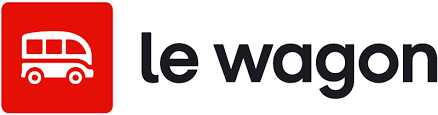

# Financial returns

## Data discovery

a) Execute cell below to load financial data into `df` variable

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

b) Describe data.

c) Use `.describe()` method to get statical summary of the columns

d) Convert `Date` column to datetime and set it as index.

e) The `value_counts()` method is very useful when working with series. You can consult its [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html).

Count the number of rows per day of the week using this function on index. 
What do you notice?

Hint: `.dayofweek` is an attribute of a datetime object

f) Still on the index, use `isocalendar()` method. What do you obtain ?

g) Display data in January and December

Hint: use method `.isin()` to filter on several values passed as a list

## Resampling and returns

a) Use resample function to calculate `AAPL.Open` minimum value and `AAPL.Close` median value per quarter.

Hint: When using more than one aggregate function, use `.agg()` method.

b) Use `pct_change()` method on column `AAPL.Close` to calculate daily returns. It's very common when you want to elaborate strategies.

c) What does this instruction do?

Imagine the time saved in comparison with excel...

In [ ]:
df.resample("QS")[["AAPL.Open", "AAPL.Close"]].first().pct_change(4)

,AAPL.Open,AAPL.Close
Date,,
2015-01-01,NaN,NaN
2015-04-01,NaN,NaN
2015-07-01,NaN,NaN
2015-10-01,NaN,NaN
2016-01-01,-0.195153,-0.175859
2016-04-01,-0.128505,-0.114769
2016-07-01,-0.247518,-0.242575
2016-10-01,0.033373,0.026830
2017-01-01,0.128545,0.102515


d) Deduce how to calculate mean `AAPL.Close` value evolution calculated quartely start.

e) Period over Period return is complex. How do you compare first day first week between two years ? Below, we calculate Apple's yearly sliding return in isodate. 

Take your time and make sure you understand it perfectly.

In [ ]:
df.groupby([df.index.isocalendar().day, df.index.isocalendar().week])[["AAPL.Close"]].pct_change()

,AAPL.Close
Date,
2015-02-17,NaN
2015-02-18,NaN
2015-02-19,NaN
2015-02-20,NaN
2015-02-23,NaN
...,...
2017-02-10,0.405681
2017-02-13,NaN
2017-02-14,0.397144


## Window functions

a) Calculate `AAPL.Close` moving average over the last 4 rolling days.

b) A very interesting feature in Python is to be able to specify a time window and not simply a number of previous rows.

Repeat the previous question using a sliding 30-day window. 

## Missing values

Weekend days do not appear in this data. 

We will generate a new DataFrame by adding them and leaving NaN as default values.

a) Create a column-free DataFrame `df_with_weekends` with dates from `2015-02-17` to `2017-02-16` including weekends as index. 

Study the `pd.date_range()` function for this.

The different possible offsets can be found in [this documentation](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases)

b) Add `df` data to this new DataFrame with `pd.merge()` function. Look at parameters left_index and right_index.

c) Now study the [fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) method, replace the missing values with next valid value. Don't replace `df_with_weekends`.

What are the other replacement options?

d) We want to fill in the missing values by **interpolation** instead. 

Study the DataFrame `interpolate()` method and do it. You can update the result in `df_with_weekends` variable.

e) Combining `date_range` and `merge` functions is not the optimal solution. But these functions are very useful in other cases.

We will study a new function: `asfreq`. Read [documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.asfreq.html).

Using this function, create a new DataFrame with weekend days from `df` DataFrame.




f) This function also allows you to apply a lower frequency than the data frequency, in this case the day.

Create a new DataFrame with a frequency of 6h from `df`.


## Financial charts

a) Execute cell below to load data from multiple tickers. Note that values have been rebased on day one. It means that you see return instead of ticker value.

In [ ]:
df = px.data.stocks()

df["date"] = pd.to_datetime(df["date"], format='%Y-%m-%d', errors='coerce')
df = df.set_index("date")
df

,GOOG,AAPL,AMZN,FB,NFLX,MSFT
date,,,,,,
2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...
2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896


b) Display GOOG ticker evolution with a line plot

c) Display the evolution of the GOOG index with its minimum and maximum cumulative value.

Look at the `cummin` and `cummax` methods. To add a line to a Plotly chart, use `fig.add_scatter()` function.

d) Display in the same chart the evolution of the GOOG index and the 10-day, 30-day and 70-day moving averages.

We now want to use faceplots argument to display returns  for each index in separate charts.

e) Using the function `pd.melt()` transform `df` into a two-column DataFrame. The first one with the name of the corresponding indices (ticker column) and the second one with the value (value column).

The result will be stored in a variable `df_melt`.

f) Use `px.area()` function and display returns for each ticker in a separate chart.